<a href="https://colab.research.google.com/github/stevengregori92/Project-3/blob/main/Project_Acquire_and_Prepare_Data_from_Web.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project - Acquire and Prepare Data from Web

## Goal of Project
- This project will focus on Step 1 and 2 (**Acquire** and **Prepare**)
- We will read raw data that needs Data Wrangling to prepare
- The process we follow demonstrates how a Data Scientist works

## Step 1: Acquire
- Explore problem
- Identify data
- Import data

### Step 1.a: Import libraries
- Execute the cell below (SHIFT + ENTER)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Step 1.b: Retrieve/Read the data
- There are two options to get data
#### Option 1: Directly from wikipedia
- Assign variable ```url = "https://en.wikipedia.org/wiki/Wikipedia:Fundraising_statistics"```
- Retrieve the data ```tables = pd.read_html(url)```
- Assign the first DataFrame to a variable
    - HINT: ```tables``` is a list DataFrame containing all the data

#### Option 2: From csv file (if option 1 fails)
- Use ```pd.read_csv()``` to read the file `files/fundraising.csv`
- NOTE: Remember to assign the result to a variable (e.g., ```data```)
- Apply ```.head()``` on the data to see all is as expected

In [ ]:
url = "https://en.wikipedia.org/wiki/Wikipedia:Fundraising_statistics"

tables = pd.read_html(url)
tables[0].head()

,Year,Source,Revenue,Expenses,Asset rise,Total assets
0,2021/22,PDF,"$ 154,686,521","$ 145,970,915","$ 8,173,996","$ 239,351,532"
1,2020/21,PDF,"$ 162,886,686","$ 111,839,819","$ 50,861,811","$ 231,177,536"
2,2019/20,PDF,"$ 129,234,327","$ 112,489,397","$ 14,674,300","$ 180,315,725"
3,2018/19,PDF,"$ 120,067,266","$ 91,414,010","$ 30,691,855","$ 165,641,425"
4,2017/18,PDF,"$ 104,505,783","$ 81,442,265","$ 21,619,373","$ 134,949,570"


In [ ]:
fundraising = tables[0]

## Step 2: Prepare
- Explore data
- Visualize ideas
- Cleaning data

### Step 2.a: Check the data types
- This step tells you if some numeric column is not represented numeric.
- Get the data types by ```.dtypes```

In [ ]:
fundraising.dtypes

Year            object
Source          object
Revenue         object
Expenses        object
Asset rise      object
Total assets    object
dtype: object

### Step 2.b: Check for null (missing) values
- Data often is missing entries - there can be many reasons for this
- We need to deal with that (will do later in course)
- Use ```.isna().any()```

In [ ]:
fundraising.isna().any()

Year            False
Source          False
Revenue         False
Expenses        False
Asset rise      False
Total assets    False
dtype: bool

### Step 2.c: Delete Source Column
- The Column Source adds no value for further investigations
- You can delete it by 
    - ```del data['Source']```

In [ ]:
del fundraising['Source']

In [ ]:
fundraising.head()

,Year,Revenue,Expenses,Asset rise,Total assets
0,2021/22,"$ 154,686,521","$ 145,970,915","$ 8,173,996","$ 239,351,532"
1,2020/21,"$ 162,886,686","$ 111,839,819","$ 50,861,811","$ 231,177,536"
2,2019/20,"$ 129,234,327","$ 112,489,397","$ 14,674,300","$ 180,315,725"
3,2018/19,"$ 120,067,266","$ 91,414,010","$ 30,691,855","$ 165,641,425"
4,2017/18,"$ 104,505,783","$ 81,442,265","$ 21,619,373","$ 134,949,570"


### Step 2.d: Convert Year column to numeric
- All the strings in years are formatted: 'YYYY/YYYY'
- To get the last year as string: ```data['Year'].str[-4:]```
- To convert that to numeric use: ```pd.to_numeric(...)```
    - HINT: You can assign the column directly

In [ ]:
fundraising['Year'] = fundraising['Year'].str[-4:]
fundraising['Year']

0     1/22
1     0/21
2     9/20
3     8/19
4     7/18
5     6/17
6     5/16
7     4/15
8     3/14
9     2/13
10    1/12
11    0/11
12    9/10
13    8/09
14    7/08
15    6/07
16    5/06
17    4/05
18    3/04
Name: Year, dtype: object

### Step 2.e: Set Year to index
- To change a column to be the index use: ```data.set_index('Year', inplace=True)```
- Also sort the index in correct order: ```data.sort_index(inplace=True)```

In [ ]:
fundraising.set_index('Year', inplace = True)

In [ ]:
fundraising.sort_index(inplace = True)

In [ ]:
fundraising

,Revenue,Expenses,Asset rise,Total assets
Year,,,,
0/11,"$ 24,785,092","$ 17,889,794","$ 9,649,413","$ 24,192,144"
0/21,"$ 162,886,686","$ 111,839,819","$ 50,861,811","$ 231,177,536"
1/12,"$ 38,479,665","$ 29,260,652","$ 10,736,914","$ 34,929,058"
1/22,"$ 154,686,521","$ 145,970,915","$ 8,173,996","$ 239,351,532"
2/13,"$ 48,635,408","$ 35,704,796","$ 10,260,066","$ 45,189,124"
3/04,"$ 80,129","$ 23,463","$ 56,666","$ 56,666"
3/14,"$ 52,465,287","$ 45,900,745","$ 8,285,897","$ 53,475,021"
4/05,"$ 379,088","$ 177,670","$ 211,418","$ 268,084"
4/15,"$ 75,797,223","$ 52,596,782","$ 24,345,277","$ 77,820,298"


### Step 2.f: Convert the remaining columns to numeric
- Remember the steps from the lesson
    - ```.str[2:]``` to remove the first two characters ('\$ ')
    - ```.str.replace(',', '')``` to remove commas
    - ```pd.to_numeric(...)``` converts string (containing well-formed number) to the numeric value
- Try to do it directly column by column

In [ ]:
fundraising['Revenue'] = fundraising['Revenue'].str[2:].str.replace(',','')
fundraising['Expenses'] = fundraising['Expenses'].str[2:].str.replace(',','')
fundraising['Asset rise'] = fundraising['Asset rise'].str[2:].str.replace(',','')
fundraising['Total assets'] = fundraising['Total assets'].str[2:].str.replace(',','')
fundraising.head()

,Revenue,Expenses,Asset rise,Total assets
Year,,,,
0/11,24785092,17889794,9649413,24192144
0/21,162886686,111839819,50861811,231177536
1/12,38479665,29260652,10736914,34929058
1/22,154686521,145970915,8173996,239351532
2/13,48635408,35704796,10260066,45189124


In [ ]:
fundraising['Revenue'] = pd.to_numeric(fundraising['Revenue'])
fundraising['Expenses'] = pd.to_numeric(fundraising['Expenses'])
fundraising['Asset rise'] = pd.to_numeric(fundraising['Asset rise'])
fundraising['Total assets'] = pd.to_numeric(fundraising['Total assets'])
fundraising.dtypes

Revenue         int64
Expenses        int64
Asset rise      int64
Total assets    int64
dtype: object

### Step 2.g: Visualize data to investigate quality
- Make a simple plot of **Revenue**, **Expenses** and **Total assets**
- This will help you spot any outliers

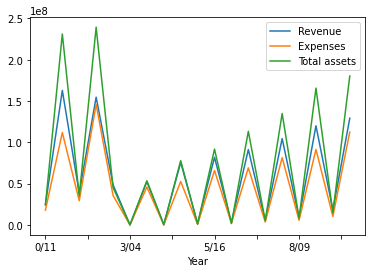

In [ ]:
fundraising[['Revenue', 'Expenses', 'Total assets']].plot()
plt.show()

### Step 2.h: Visualize data to investigate quality
- Make a simple plot of **Asset rise**
- This will help you spot any outliers

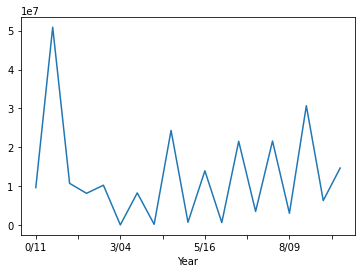

In [ ]:
fundraising['Asset rise'].plot()
plt.show()